# Gold Price Predicition : A dataset of daily gold prices spanning from January-19-2014 to January-22-2024



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [24]:
#Read the gold prediction dataset as gold price dataframe
gold_price_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Gold_Price_Prediction/goldstock.csv")

 Preprocess the data by:
1. Dropping First Column
2. Check for any null values
3. Check if columsn are appropriate datatypes

In [25]:
gold_price_df = gold_price_df.drop(gold_price_df.columns[0],axis=1)

In [26]:
gold_price_df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [27]:
# Convert 'Date' column to datetime and set as index
gold_price_df['Date'] = pd.to_datetime(gold_price_df['Date'])

In [6]:
# Set date column as index
gold_price_df.set_index('Date', inplace=True)

In [7]:
#summary of the gold price
gold_price_df.head(), gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2024-01-19 to 2014-01-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2511 non-null   float64
 1   Volume  2511 non-null   float64
 2   Open    2511 non-null   float64
 3   High    2511 non-null   float64
 4   Low     2511 non-null   float64
dtypes: float64(5)
memory usage: 117.7 KB


(             Close    Volume    Open    High     Low
 Date                                                
 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
 2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
 2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
 2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1,
 None)

## Time Series Analysis

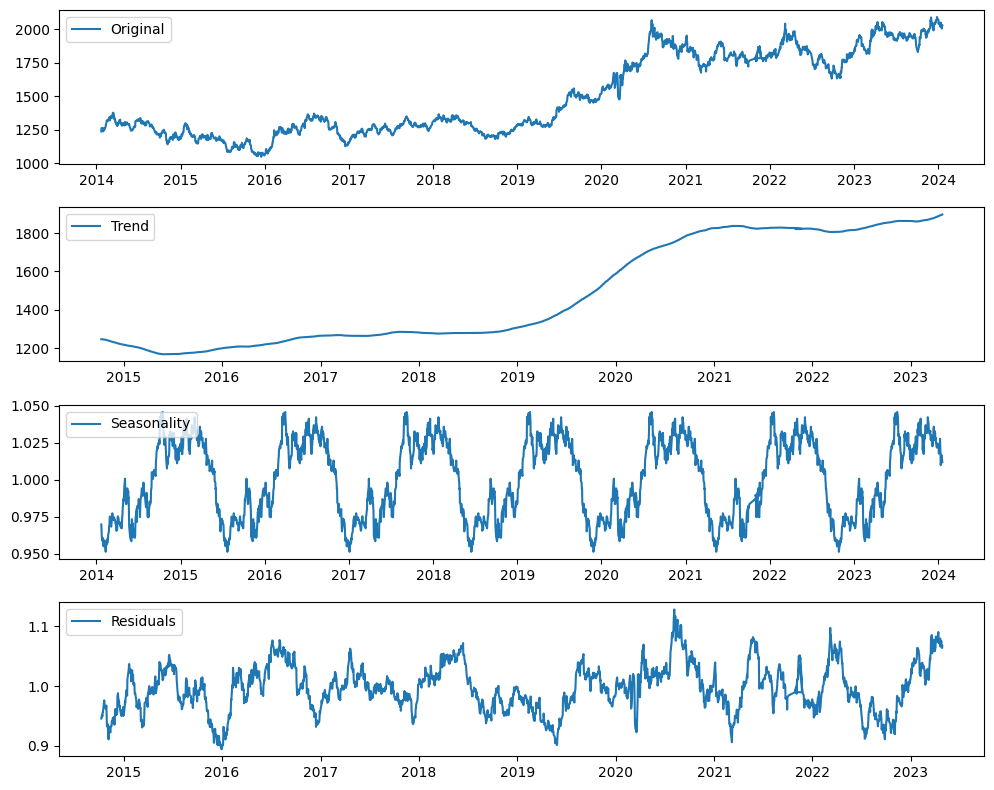

In [8]:
# Decompose the time series
result = seasonal_decompose(gold_price_df['Close'], model='multiplicative', period=365)

trend = result.trend
seasonal = result.seasonal
residual = result.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(gold_price_df['Close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

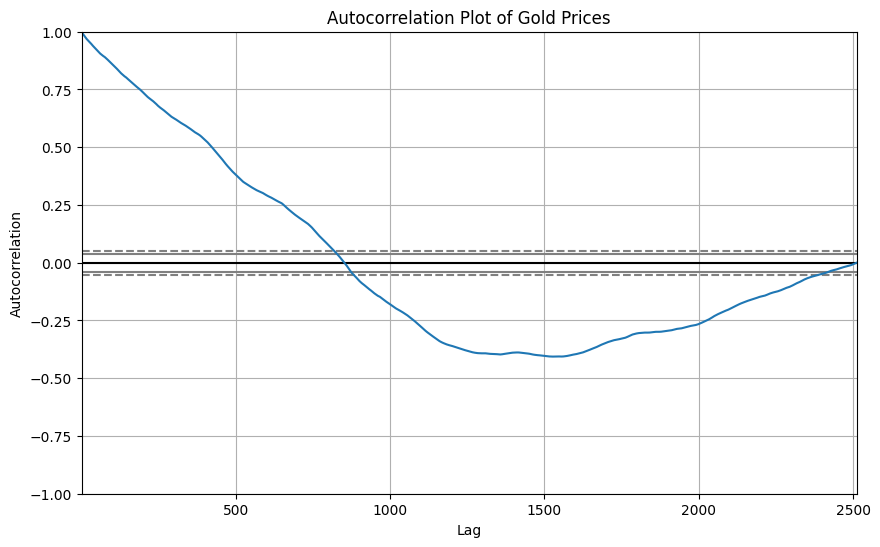

In [9]:
# analyze cyclicality using autocorrelation plots
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(gold_price_df['Close'])
plt.title('Autocorrelation Plot of Gold Prices')
plt.show()


## Modelling
### Linear regression Approach

In [ ]:
#define features and target variables of interest
X = gold_price_df.iloc[:,-4:].values
y = gold_price_df.iloc[:, 0].values

In [ ]:
#Split the data into training and testing
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#Fit and train the LinearRegression Model
#fit the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

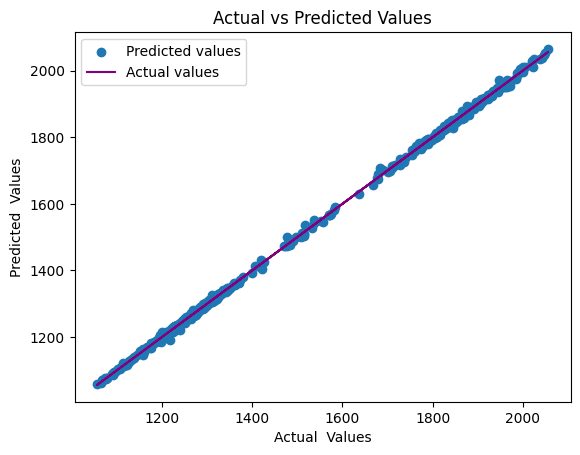

In [ ]:
#Used a scatter graph to chect the accuracy of the model using actual vs predicted values
plt.scatter(y_test, y_pred, label ="Predicted values")
plt.plot(y_test,y_test, label = "Actual values", color ='purple')
plt.xlabel('Actual  Values')
plt.ylabel('Predicted  Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
#Evaulate the model on the testing data and checking acccuracy using r2
from sklearn.metrics import r2_score
r2 =r2_score(y_test, y_pred)
print('r2 Score:',r2)

r2 Score: 0.9996331952535923


### Long Short-Term Memory (LSTM)

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#extract the 'close' column from the dataset
close_price = gold_price_df['Close']

In [ ]:
# convert 'close' column to a numpy array
values = close_price.values

In [ ]:
# Calculate the length of the training data by taking 80% of the total length of the 'values' array
training_data_len = math.ceil(len(values) * 0.8)

In [ ]:
# Create a MinMaxScaler object and scale the values to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values.reshape(-1, 1))

In [ ]:
# Split the scaled data into training and test sets
train_data = scaled_data[0: training_data_len, :]
test_data = scaled_data[training_data_len - 60: , : ]

In [ ]:
# Initialize empty lists for the training and test inputs and outputs
x_train, y_train = [], []
x_test = []

# Loop through the training data and create input/output pairs
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])

# Convert the training inputs and outputs to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the training inputs to be 3D for use with an LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Loop through the test data and create input sequences
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60: i, 0])

# Convert the test inputs to a NumPy array and reshape to be 3D
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the test outputs as a NumPy array from the 'values' array
y_test = values[training_data_len:]

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1949, 60, 1)
y_train shape: (1949,)
x_test shape: (502, 60, 1)
y_test shape: (502,)


In [ ]:
#Create the LSTM Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
# model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=10)

Epoch 1/10
1949/1949 [==============================] - 162s 81ms/step - loss: 0.0024
Epoch 2/10
1949/1949 [==============================] - 160s 82ms/step - loss: 7.7311e-04
Epoch 3/10
1949/1949 [==============================] - 159s 82ms/step - loss: 7.0943e-04
Epoch 4/10
1949/1949 [==============================] - 156s 80ms/step - loss: 5.0499e-04
Epoch 5/10
1949/1949 [==============================] - 158s 81ms/step - loss: 5.1744e-04
Epoch 6/10
1949/1949 [==============================] - 157s 80ms/step - loss: 4.9040e-04
Epoch 7/10
1949/1949 [==============================] - 159s 81ms/step - loss: 4.6276e-04
Epoch 8/10
1949/1949 [==============================] - 155s 79ms/step - loss: 4.6723e-04
Epoch 9/10
1949/1949 [==============================] - 159s 81ms/step - loss: 4.3339e-04
Epoch 10/10
1949/1949 [==============================] - 157s 81ms/step - loss: 4.3145e-04


In [ ]:
#Validate the Model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root mean squared error:', rmse)

16/16 [==============================] - 1s 90ms/step
Root mean squared error: 1.0772447320094616


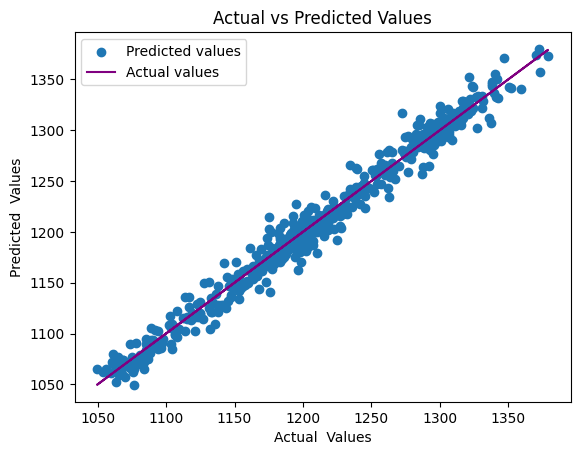

In [ ]:
plt.scatter(y_test, predictions, label ="Predicted values")
plt.plot(y_test,y_test, label = "Actual values", color ='purple')
plt.xlabel('Actual  Values')
plt.ylabel('Predicted  Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
r2 =r2_score(y_test, predictions)
print('r2 Score:',r2)

r2 Score: 0.9782678231168593


## Trading Strategy Development :

We'll formulate two trading strategies and backtest them:

Moving Average Crossover Strategy: Using short-term and long-term moving averages to generate buy and sell signals.
Volume-based Strategy: Using volume spikes to signal potential reversals.

In [19]:
data = gold_price_df

In [11]:
# Sort by date just in case
data.sort_values(by='Date', inplace=True)

# Calculate moving averages for the Moving Average Crossover Strategy
short_window = 20
long_window = 50
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Calculate volume rolling mean for the Volume-based Strategy
volume_window = 10
data['Volume_Mean'] = data['Volume'].rolling(window=volume_window, min_periods=1).mean()

# Initialize signals
data['MA_Signal'] = 0
data['Volume_Signal'] = 0

# Generate signals for Moving Average Crossover Strategy
data['MA_Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['MA_Signal'][short_window:] = np.where(data['Short_MA'][short_window:] < data['Long_MA'][short_window:], -1, data['MA_Signal'][short_window:])

# Generate signals for Volume-based Strategy
data['Volume_Signal'][volume_window:] = np.where(data['Volume'][volume_window:] > 1.5 * data['Volume_Mean'][volume_window:], 1, 0)
data['Volume_Signal'][volume_window:] = np.where(data['Volume'][volume_window:] < 0.5 * data['Volume_Mean'][volume_window:], -1, data['Volume_Signal'][volume_window:])

# Define a function to backtest a given strategy
def backtest_strategy(data, signal_column, initial_balance=100000, shares_per_trade=10):
    balance = initial_balance
    shares = 0
    for i in range(len(data)):
        if data[signal_column].iloc[i] == 1 and balance >= shares_per_trade * data['Close'].iloc[i]:
            shares += shares_per_trade
            balance -= shares_per_trade * data['Close'].iloc[i]
        elif data[signal_column].iloc[i] == -1 and shares >= shares_per_trade:
            shares -= shares_per_trade
            balance += shares_per_trade * data['Close'].iloc[i]
    final_value = balance + shares * data['Close'].iloc[-1]
    return final_value

# Backtest both strategies
initial_balance = 100000
ma_final_value = backtest_strategy(data, 'MA_Signal', initial_balance)
volume_final_value = backtest_strategy(data, 'Volume_Signal', initial_balance)

# Backtest reverse strategies
reverse_ma_final_value = backtest_strategy(data, 'MA_Signal', initial_balance, shares_per_trade=-10)
reverse_volume_final_value = backtest_strategy(data, 'Volume_Signal', initial_balance, shares_per_trade=-10)

<ipython-input-11-5a506ca8f9b6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA_Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
<ipython-input-11-5a506ca8f9b6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA_Signal'][short_window:] = np.where(data['Short_MA'][short_window:] < data['Long_MA'][short_window:], -1, data['MA_Signal'][short_window:])
<ipython-input-11-5a506ca8f9b6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

**Moving Average Crossover Strategy**: This strategy resulted in a profit, increasing the initial balance from $100,000 to $136,937. It indicates that using the crossover of short-term and long-term moving averages can be a viable trading strategy.

**Volume-based Strategy**: This strategy was less effective, yielding a smaller profit of $4,875. While volume spikes can sometimes indicate potential reversals, this approach might require more nuanced parameters or a combination with other indicators to be more effective.

**Reverse Strategies**: Both reverse strategies resulted in significant losses,
indicating that taking opposite actions based on these signals is not feasible for profit maximization. These results reinforce the validity of the original strategies in the given context.

In [12]:
print("Moving Average Crossover Strategy yielded :$",ma_final_value)
print("Volume Based Strategy yielded :$",volume_final_value)
print("Reversed Moving Average Crossover Strategy yielded :$",reverse_ma_final_value)
print("Volume Based Strategy yielded :$",reverse_volume_final_value)

Moving Average Crossover Strategy yielded :$ 136937.0
Volume Based Strategy yielded :$ 104875.0
Reversed Moving Average Crossover Strategy yielded :$ -6450751.0
Volume Based Strategy yielded :$ -1048550.0


## Market Sentiment Analysis:

In [13]:
# Outlining all notable market events that happened between 2014-2024 so far.
import pandas as pd

# Example event data
events = {
    'Date': ['2015-06-30', '2016-06-23', '2016-11-08', '2018-07-06', '2020-03-11',
             '2020-11-03', '2022-02-24', '2023-05-15', '2023-10-01'],
    'Event': ['Greek Debt Crisis', 'Brexit Referendum', 'US Presidential Election 2016',
              'US-China Trade War', 'COVID-19 Pandemic', 'US Presidential Election 2020',
              'Russian Invasion of Ukraine', 'Global Inflation Concerns', 'US Debt Ceiling Crisis']
}

event_data = pd.DataFrame(events)
event_data['Date'] = pd.to_datetime(event_data['Date'])
event_data = event_data.sort_values(by='Date')

Merge Event Data with Gold Price Data

In [31]:
data = gold_price_df

In [32]:
data = data.sort_values(by='Date')

In [33]:
data.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [35]:
gold_event_data = pd.merge(data, event_data, on='Date', how='left')

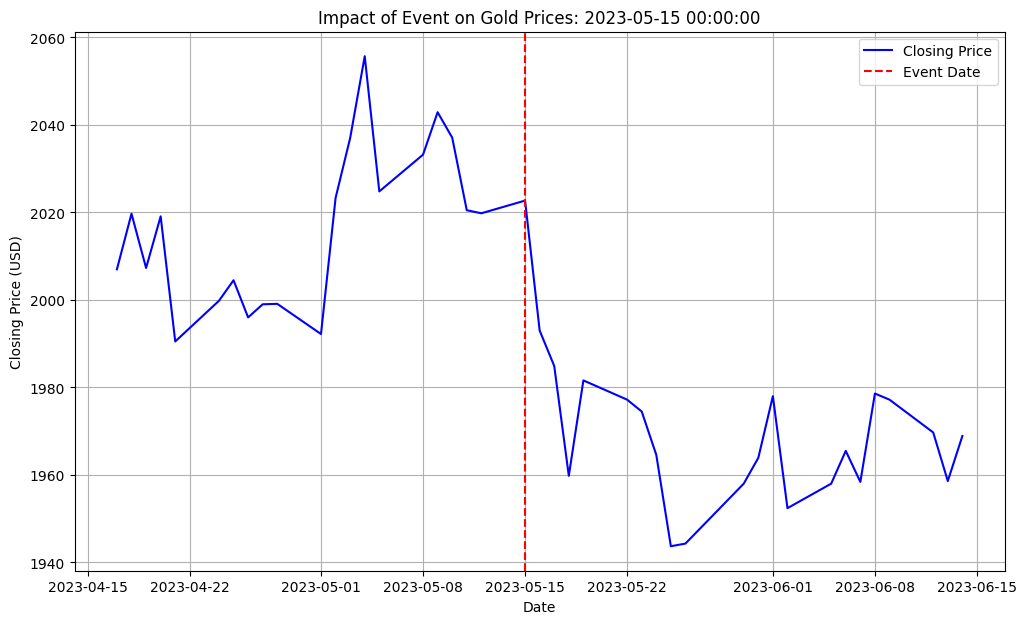

In [48]:
from typing_extensions import dataclass_transform
import matplotlib.pyplot as plt

# Function to plot gold prices around an event
def plot_event_impact(event_date, window=30):
    # Select data around the event date
    event_window = data[(data['Date'] >= event_date - pd.Timedelta(days=window)) &
                             (data['Date'] <= event_date + pd.Timedelta(days=window))]

    # Plot the data
    plt.figure(figsize=(12, 7))
    plt.plot(event_window['Date'], event_window['Close'], label='Closing Price', color='blue')
    plt.axvline(event_date, color='red', linestyle='--', label='Event Date')
    plt.title(f'Impact of Event on Gold Prices: {event_date}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot impact of COVID-19 Pandemic
plot_event_impact(pd.to_datetime('2023-05-15'))

## Statistical Analysis

The p-value is greater than 0.05, indicating that the null hypothesis (that the series is non-stationary) cannot be rejected. Thus, the gold price series is non-stationary.

In [37]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(gold_price_df['Close'].dropna())

# Display the ADF test results
adf_result


(-1.7172755789704768,
 0.4222342775667287,
 0,
 2510,
 {'1%': -3.4329579682301254,
  '5%': -2.8626921885291017,
  '10%': -2.5673833542324727},
 20375.33875879546)

In [49]:
correlation_matrix = gold_price_df.corr()

# Display the correlation matrix
correlation_matrix

,Date,Close,Volume,Open,High,Low
Date,1.000000,0.890902,0.100190,0.890809,0.889666,0.892313
Close,0.890902,1.000000,0.022835,0.998994,0.999524,0.999576
Volume,0.100190,0.022835,1.000000,0.027012,0.030871,0.018274
Open,0.890809,0.998994,0.027012,1.000000,0.999459,0.999386
High,0.889666,0.999524,0.030871,0.999459,1.000000,0.999251
Low,0.892313,0.999576,0.018274,0.999386,0.999251,1.000000
